In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Biología', 'Física', 'Química', 'Educación Física', 'Inglés', 'Ciudadanía', 'Arte', 'Música', 'Informática']

# Función para generar un nombre y apellido aleatorio
def generar_nombre():
  nombres = ['Juan', 'Pedro', 'Maria', 'Ana', 'Luis', 'Sofia', 'Carlos', 'Laura', 'Diego', 'Valentina']
  apellidos = ['Gomez', 'Perez', 'Rodriguez', 'Lopez', 'Gonzalez', 'Martinez', 'Sanchez', 'Ramirez', 'Fernandez', 'Torres']
  return f"{random.choice(nombres)} {random.choice(apellidos)}"


# Crear una lista para almacenar los datos
data = []

# Generar 100 filas de datos
for i in range(100):
  nombre_completo = generar_nombre()
  dni = random.randint(10000000, 50000000)
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)
  data.append([nombre_completo, dni, materia, nota1, nota2, nota3, faltas])


# Crear el DataFrame
df = pd.DataFrame(data, columns=['Nombre Completo', 'DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a Clases'])

# Mostrar las primeras 5 filas del DataFrame
print(df.head())

    Nombre Completo       DNI             Materia  Nota 1er Trimestre  \
0      Juan Ramirez  34403861           Geografía                   2   
1       Diego Perez  40679918              Física                  10   
2   Laura Fernandez  22079616                Arte                   2   
3     Diego Ramirez  17815209              Música                   8   
4  Carlos Fernandez  24709585  Ciencias Naturales                   6   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a Clases  
0                  10                   8                1  
1                   8                   1                8  
2                   6                   5               18  
3                   7                   4                5  
4                   7                   1               10  


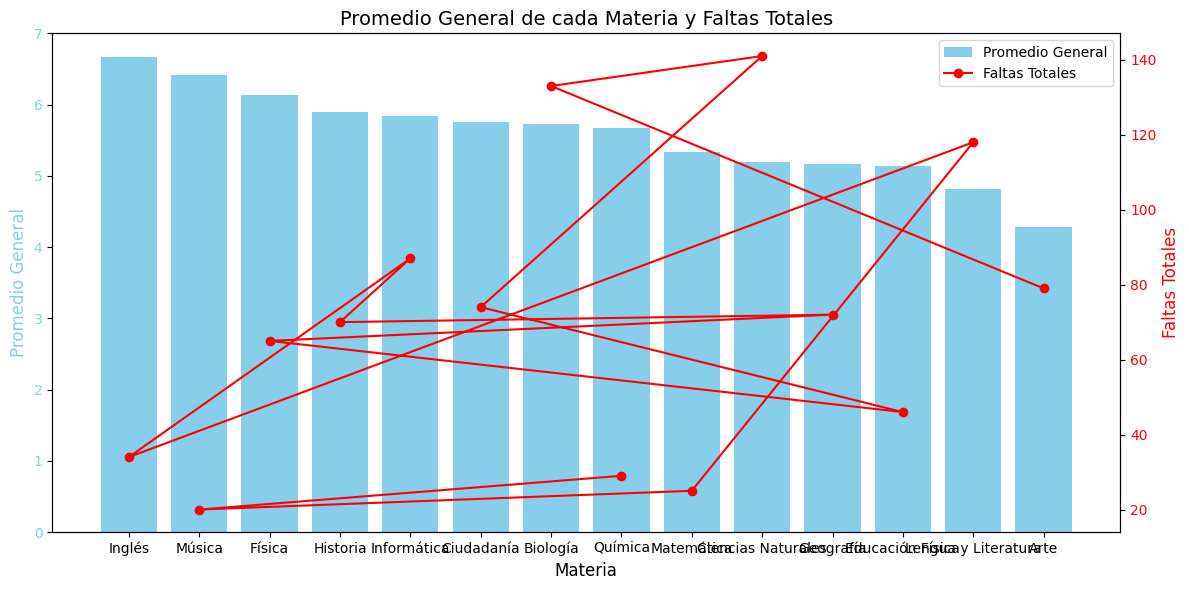

In [4]:
# prompt: armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
average_grades['Promedio General'] = average_grades.mean(axis=1)
average_grades = average_grades.sort_values('Promedio General', ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia')['Faltas a Clases'].sum()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average grades
ax1.bar(average_grades.index, average_grades['Promedio General'], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia', fontsize=12)
ax1.set_ylabel('Promedio General', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de cada Materia y Faltas Totales', fontsize=14)

# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences, marker='o', color='red', label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [5]:
# prompt: df.to_csv("datos_alumnos.csv", index=False)

df.to_csv("datos_alumnos.csv", index=False)